<a href="https://colab.research.google.com/github/DarkSABBATH/AML_assignments/blob/main/assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# LOAD DATA
target_column = 'Price'

df = pd.read_csv('/content/USA_Housing_toy.csv')

# Display first few rows and column names for checking
print(df.head())
print("Columns:", df.columns)

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             79545                    6                          7   
1             79249                    6                          7   
2             61287                    6                          9   
3             63345                    7                          6   
4             59982                    5                          8   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09            23087  1.059034e+06   
1                          3.09            40173  1.505891e+06   
2                          5.13            36882  1.058988e+06   
3                          3.26            34310  1.260617e+06   
4                          4.23            26354  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [5]:
#DEFINE FEATURES AND TARGET ===
X = df.drop([target_column, 'Address'], axis=1)
y = df[target_column]

# TRAIN/TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# GRIDSEARCH FOR RANDOM FOREST REGRESSOR ===
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("\nBest Random Forest parameters:", grid_search.best_params_)


Best Random Forest parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [6]:
#  FIT OTHER MODELS
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [7]:
#  EVALUATE MODELS
models = {
    'Linear Regression': lr,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Random Forest (Tuned)': best_rf
}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
print("\nModel Performance on Test Set:")
print(results_df)


Model Performance on Test Set:
                                MSE        R2
Linear Regression      1.451936e+10  0.874045
Ridge Regression       1.451948e+10  0.874044
Lasso Regression       1.451936e+10  0.874045
Random Forest (Tuned)  1.952072e+10  0.830659


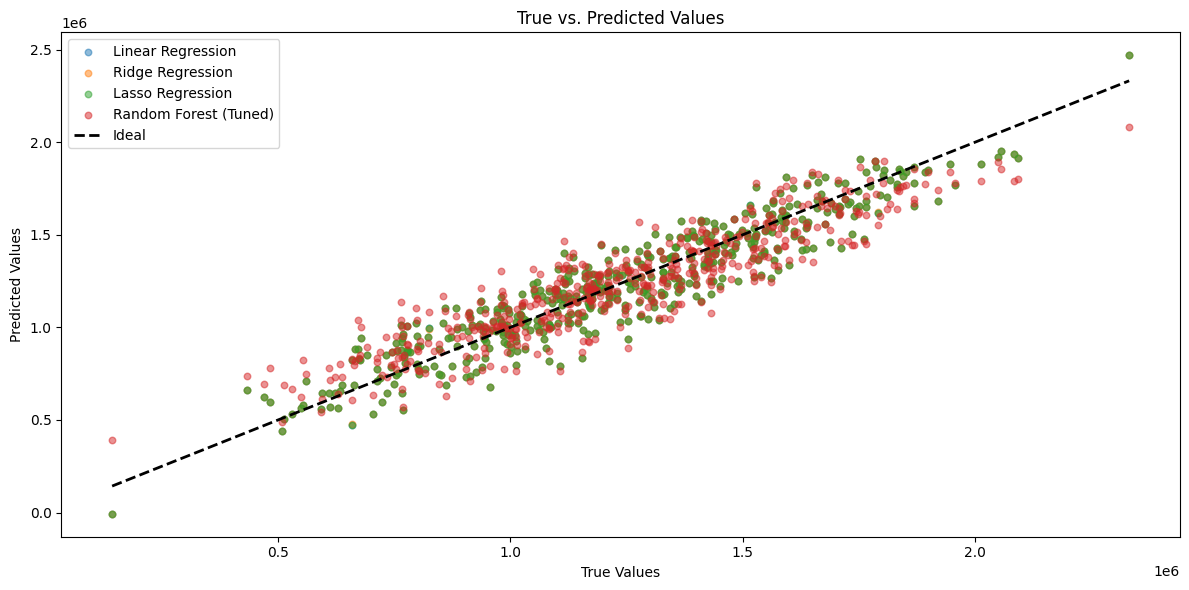

In [8]:
# VISUALIZATION: TRUE VS PREDICTED VALUES
plt.figure(figsize=(12,6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name, s=22)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()


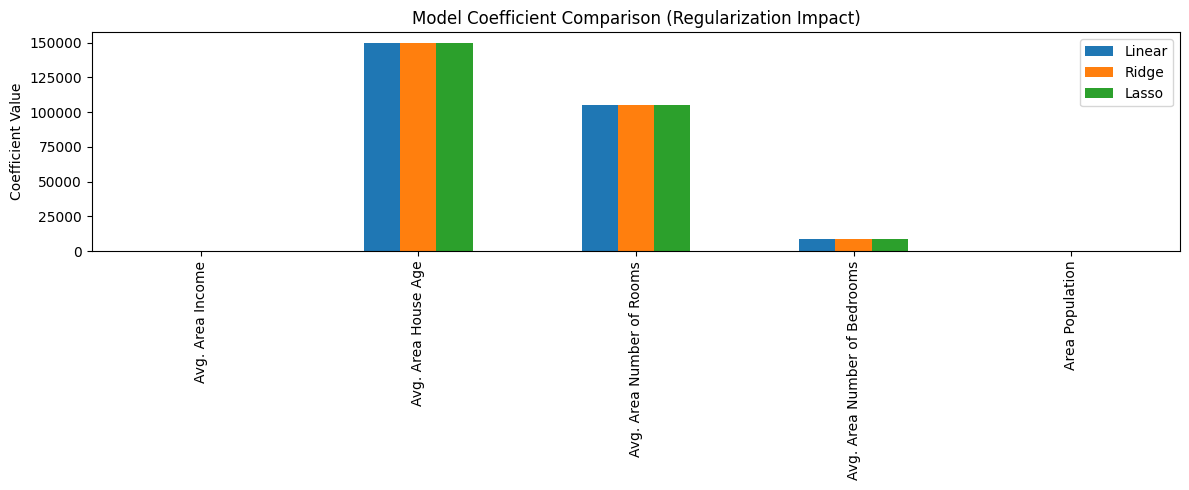

In [9]:
#  VISUALIZATION: COEFFICIENTS (LINEAR MODELS ONLY)
coefs = pd.DataFrame({
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}, index=X.columns)
coefs.plot(kind='bar', figsize=(12,5), title="Model Coefficient Comparison (Regularization Impact)")
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()